In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import metpy  # accessor needed to parse crs
import calendar
import argparse
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import geopandas
from geodatasets import get_path
import glob

In [2]:
vegc_paths = glob.glob(r'/home/smmrrr/TEM_output_processed/historical_run_model_data/[VEG|SOIL]*')
len(vegc_paths)

98

In [3]:
for i in range(len(vegc_paths)):
    
    file = pd.read_csv(vegc_paths[i])
    if i == 0:
        all_files = file
    else:
        all_files = pd.concat([all_files, file], axis = 0)
    
all_files.to_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/AGU_analysis_2023/all_gridcells_stand_age_1800_2014.csv', 
                index = False)

In [4]:
###drop the extremely high gridcell 
# all_files = pd.read_csv('/home/smmrrr/TEM_Analysis/TEM_Analysis/AGU_analysis_2023/all_gridcells_stand_age_1800_2014.csv')


all_files = all_files.loc[~((all_files['lat']==46) & (all_files['lon']==-94.5))]
all_files = all_files.loc[all_files['cohort_area']>0]
all_files = all_files.reset_index(drop = True)


In [5]:
all_files[['cohort_area', 'value_weight']].describe()

# all_files.dtypes

,cohort_area,value_weight
count,5.833311e+07,5.833311e+07
mean,3.526340e+02,7.186204e+03
std,6.572864e+02,8.132395e+03
min,1.000000e+00,0.000000e+00
25%,1.300000e+01,2.840321e+03
50%,5.200000e+01,6.452337e+03
75%,2.790000e+02,9.586794e+03
max,3.091000e+03,3.874611e+05


In [30]:
all_files

,lon,lat,variable,forest_type,subtype,year,silt_clay,stand_age_interval_min,cohort_area,land_area,value_weight
0,-69.5,-55.5,VEGC,Temperate Coniferous,5,1800,36.01,151,1534,1536,9449.950000
1,-69.5,-55.5,VEGC,Temperate Coniferous,5,1801,36.01,151,1534,1536,9450.820000
2,-69.5,-55.5,VEGC,Temperate Coniferous,5,1802,36.01,151,1534,1536,9442.820000
3,-69.5,-55.5,VEGC,Temperate Coniferous,5,1803,36.01,151,1534,1536,9429.080000
4,-69.5,-55.5,VEGC,Temperate Coniferous,5,1804,36.01,151,1534,1536,9415.800000
...,...,...,...,...,...,...,...,...,...,...,...
32686121,1.0,47.5,SOILORGC,Tropical,10,2014,66.76,61,31,29092,3672.861935
32686122,1.0,47.5,SOILORGC,Tropical,10,2014,66.76,71,58,41560,3625.486207
32686123,1.0,47.5,SOILORGC,Tropical,10,2014,66.76,81,56,29092,4239.706964
32686124,1.0,47.5,SOILORGC,Tropical,10,2014,66.76,91,77,22858,4746.857922


In [64]:
nested_list = [re.findall('Boreal|Temperate|Tropical', f) for f in all_files.forest_type]
all_files['forest_zone'] = [item for sublist in nested_list for item in sublist]


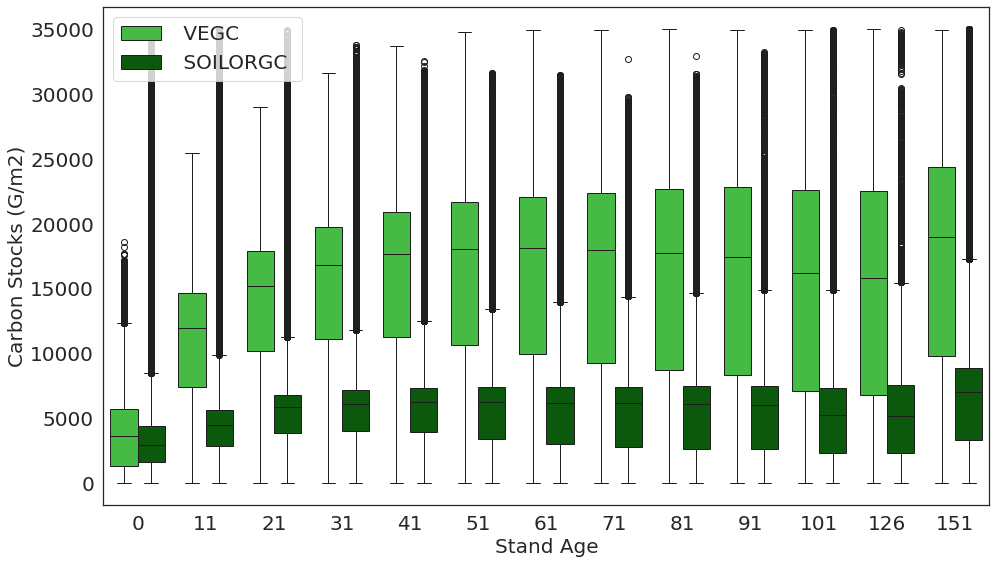

In [7]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
custom_palette = {' VEGC ': 'limegreen', ' SOILORGC ': 'darkgreen'}

sns.boxplot(x='stand_age_interval_min', y='value_weight', hue='variable'
                ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=all_files.loc[(all_files['forest_type']=='Tropical')
                                 &(all_files['year'].between(1900, 2014))
                                 &(all_files['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20}, loc = 'upper left')
plt.tight_layout()
plt.show()



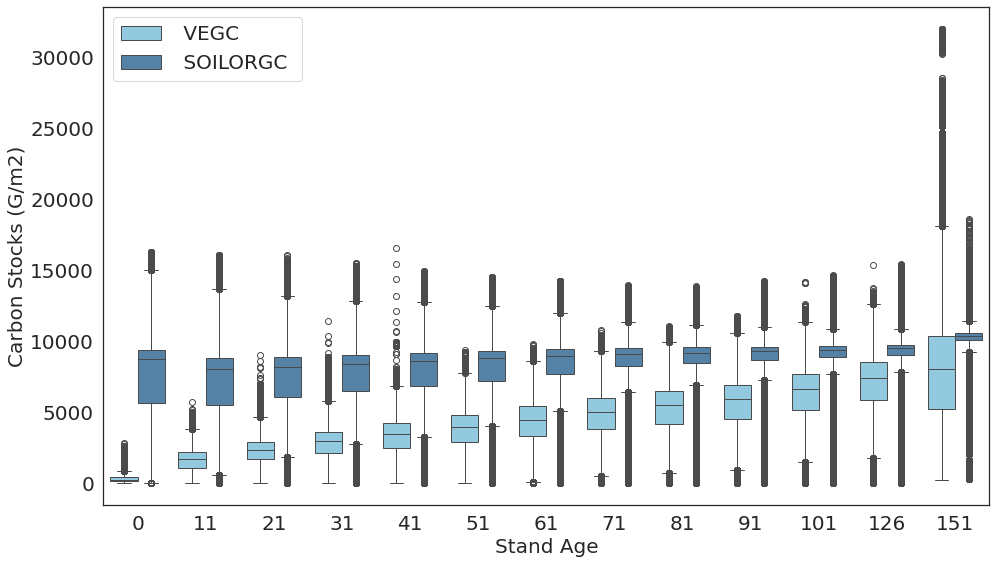

In [8]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
custom_palette = {' VEGC ': 'skyblue', ' SOILORGC ': 'steelblue'}

sns.boxplot(x='stand_age_interval_min', y='value_weight', hue='variable'
                ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=all_files.loc[(all_files['forest_type']=='Boreal')
                                 &(all_files['year'].between(1900, 2014))
                                 &(all_files['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20})
plt.tight_layout()
plt.show()



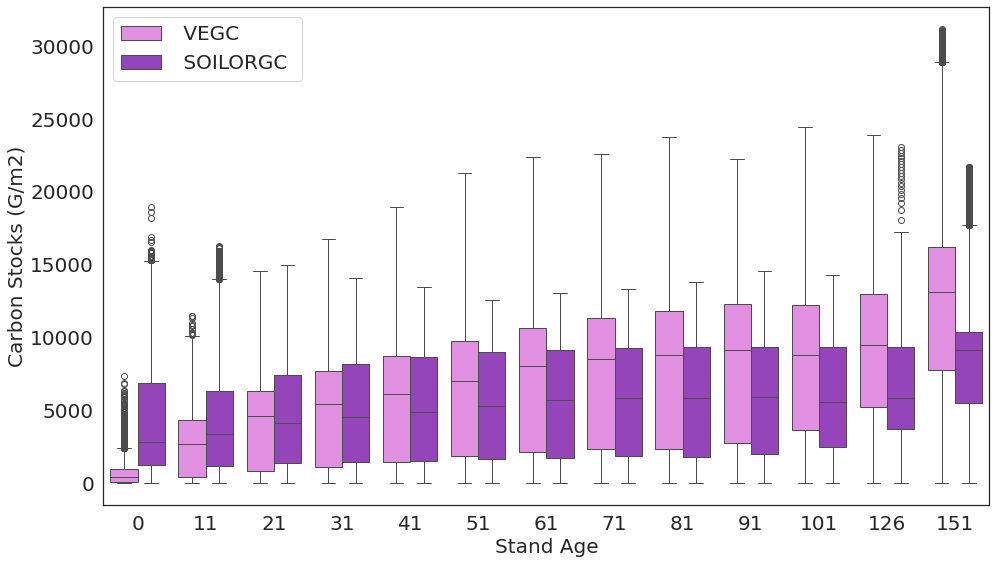

In [9]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
custom_palette = {' VEGC ': 'violet', ' SOILORGC ': 'darkorchid'}

sns.boxplot(x='stand_age_interval_min', y='value_weight', hue='variable'
                ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=all_files.loc[(all_files['forest_type']=='Temperate Coniferous')
                                 &(all_files['year'].between(1900, 2014))
                                 &(all_files['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20})
plt.tight_layout()
plt.show()



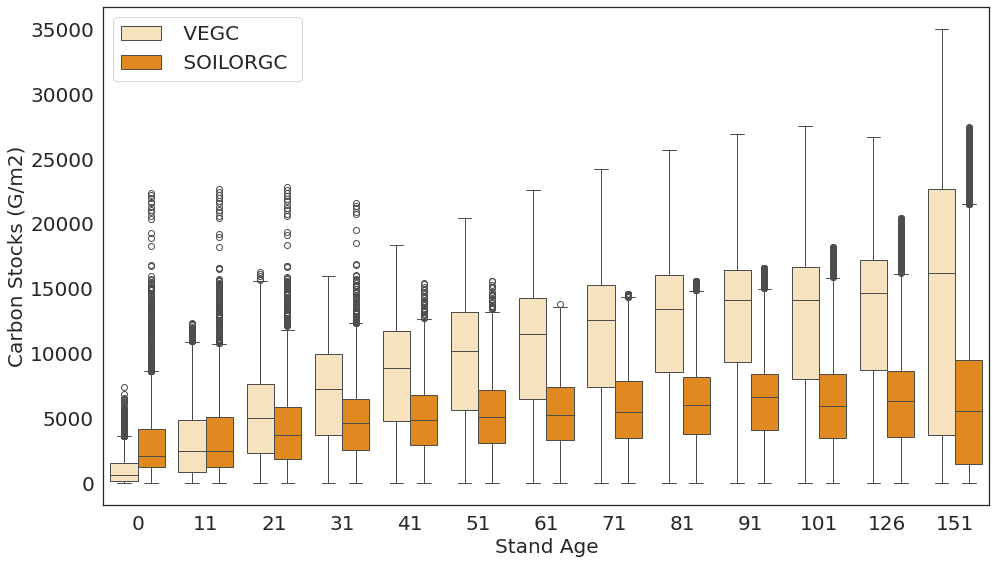

In [10]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
custom_palette = {' VEGC ': 'moccasin', ' SOILORGC ': 'darkorange'}

sns.boxplot(x='stand_age_interval_min', y='value_weight', hue='variable'
                ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=all_files.loc[(all_files['forest_type']=='Temperate Deciduous')
                                 &(all_files['year'].between(1900, 2014))
                                 &(all_files['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20})
plt.tight_layout()
plt.show()



In [30]:
clm_data = pd.read_csv('/home/smmrrr/TEM_output_processed/historical_run_model_data/climate_inputs.csv')


In [31]:
clm_data

,lon,lat,Area,year,vpr,trange,tair,wind,nirr,prec
0,-180.0,65.0,1040,1851,3.67,6.05,-10.32,2.94,108.37,44.01
1,-180.0,65.0,1040,1852,3.98,6.33,-8.96,2.53,115.14,45.38
2,-180.0,65.0,1040,1853,3.92,5.90,-9.32,3.16,104.91,45.55
3,-180.0,65.0,1040,1854,3.78,5.52,-9.96,3.92,106.03,41.42
4,-180.0,65.0,1040,1855,3.94,5.92,-8.33,2.11,115.31,39.28
...,...,...,...,...,...,...,...,...,...,...
10267707,179.5,71.0,993,2010,3.53,3.06,-9.35,2.32,100.27,27.52
10267708,179.5,71.0,993,2011,3.49,3.64,-10.00,1.59,96.73,35.05
10267709,179.5,71.0,993,2012,4.05,3.19,-8.30,2.18,96.36,24.52
10267710,179.5,71.0,993,2013,4.02,2.96,-8.46,2.33,96.64,28.06


In [32]:
model_data = all_files.merge(clm_data, on = ['lon', 'lat', 'year'])

In [42]:
model_data['tair_mean'] = model_data.groupby(['lon', 'lat'])[' tair '].transform('mean')
model_data['tair_deviations'] = model_data[' tair '] - model_data['tair_mean']


In [43]:
model_data

,lon,lat,variable,forest_type,subtype,year,silt_clay,stand_age_interval_min,cohort_area,land_area,...,temp_stand_age,Area,vpr,trange,tair,wind,nirr,prec,tair_mean,tair_deviations
0,-69.5,-55.5,VEGC,Boreal,4,1851,36.01,151,1533,1536,...,231483,1536,7.74,3.25,5.58,6.76,101.24,80.73,5.950369,-0.370369
1,-69.5,-55.5,SOILORGC,Boreal,4,1851,36.01,151,1533,1536,...,231483,1536,7.74,3.25,5.58,6.76,101.24,80.73,5.950369,-0.370369
2,-69.5,-55.5,VEGC,Boreal,4,1852,36.01,151,1533,1536,...,231483,1536,7.41,3.55,4.70,6.25,103.56,75.48,5.950369,-1.250369
3,-69.5,-55.5,SOILORGC,Boreal,4,1852,36.01,151,1533,1536,...,231483,1536,7.41,3.55,4.70,6.25,103.56,75.48,5.950369,-1.250369
4,-69.5,-55.5,VEGC,Boreal,4,1853,36.01,151,1533,1536,...,231483,1536,7.76,3.27,5.62,5.05,108.89,69.02,5.950369,-0.330369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45857886,50.0,53.5,SOILORGC,Temperate Broadleaved Evergreen Forests,12,2013,68.77,151,83,1827,...,12533,1827,9.05,8.37,7.03,2.00,139.04,51.52,4.455263,2.574737
45857887,50.0,53.5,SOILORGC,Temperate Broadleaved Evergreen Forests,12,2014,68.77,151,83,1827,...,12533,1827,9.55,8.52,8.41,1.74,146.03,58.56,4.455263,3.954737
45857888,50.0,55.0,SOILORGC,Temperate Broadleaved Evergreen Forests,12,1920,72.87,151,10,1762,...,1510,1762,8.36,9.10,5.10,1.84,141.77,52.88,4.183238,0.916762
45857889,50.0,55.0,SOILORGC,Temperate Broadleaved Evergreen Forests,12,1921,72.87,151,5,1762,...,755,1762,8.46,8.34,5.53,2.03,139.98,55.78,4.183238,1.346762


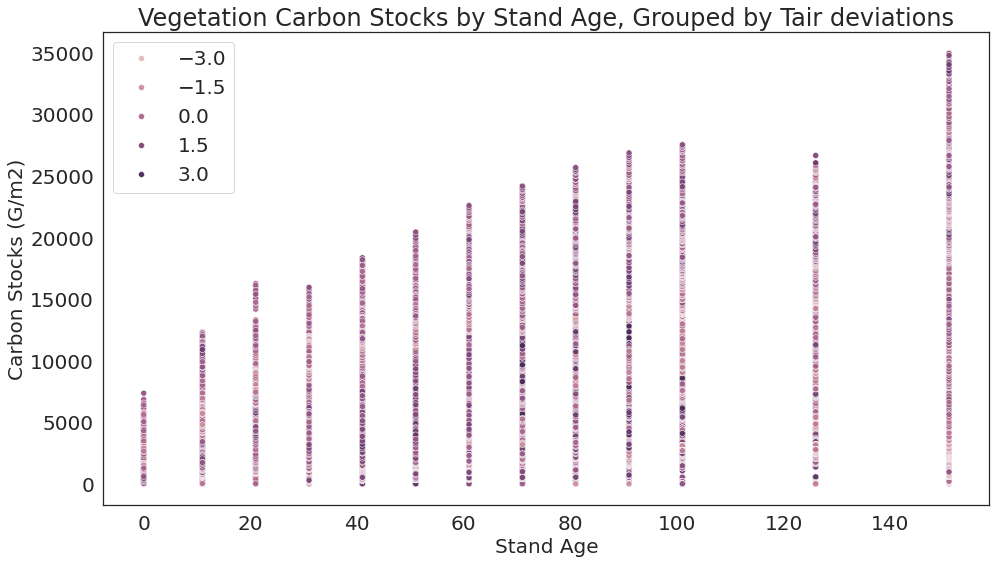

In [44]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'moccasin', ' SOILORGC ': 'darkorange'}

sns.scatterplot(x='stand_age_interval_min', y='value_weight', hue='tair_deviations'
                # ,palette=custom_palette
                # , style = 'variable'
             # , linewidth = 3
        
             , data=model_data.loc[(model_data['forest_type']=='Temperate Deciduous')
                                 &(model_data['year'].between(1900, 2014))
                                   &(model_data['variable']== ' VEGC ')
                                 &(model_data['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.title('Vegetation Carbon Stocks by Stand Age, Grouped by Tair deviations', fontsize = 24)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20})
plt.tight_layout()
plt.show()



/tmp/ipykernel_371434/1755624997.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


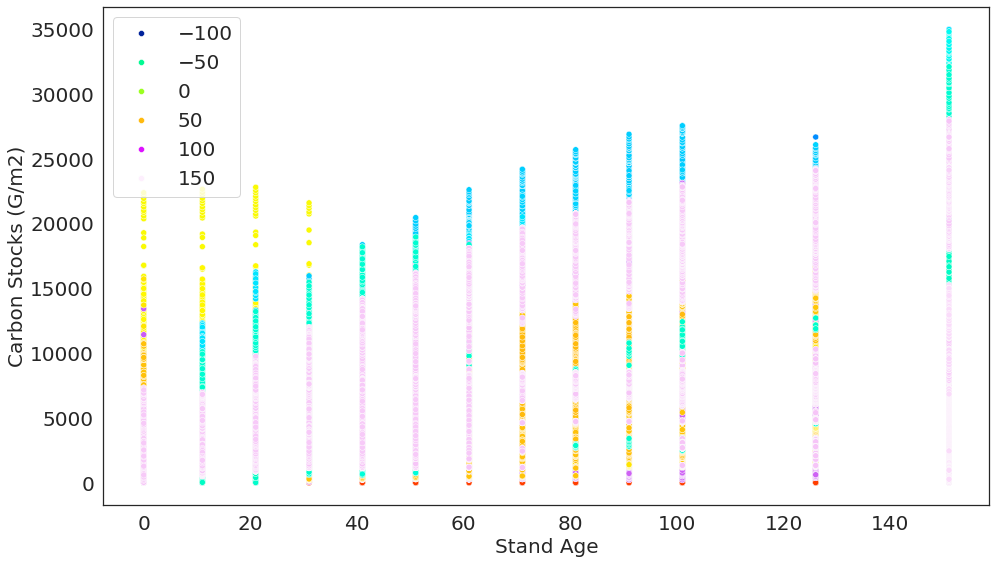

In [38]:
sns.set(style="white")

# Create the line plot using Seaborn's lineplot
plt.figure(figsize=(14, 8))  # Adjust figure size if needed
# custom_palette = {' VEGC ': 'moccasin', ' SOILORGC ': 'darkorange'}

sns.scatterplot(x='stand_age_interval_min', y='value_weight', hue='lon'
                # ,palette=custom_palette
                # ,palette = 'gist_ncar'
                # , style = 'variable'
             # , linewidth = 3
        
             , data=model_data.loc[(model_data['forest_type']=='Temperate Deciduous')
                                 &(model_data['year'].between(1900, 2014))
                                 &(model_data['value_weight'] < 35000)])

# Add the second variable to the same plot
# sns.lineplot(x='stand_age_interval_min', y=' SOILORGC ', style='forest_zone', color = 'brown', linewidth = 3, data=pfts3, markers=True, legend=False)

plt.xlabel('Stand Age', fontsize = 20)
plt.ylabel('Carbon Stocks (G/m2)', fontsize = 20)
plt.title('Carbon Stocks (G/m2)', fontsize = 20)
plt.tight_layout()  # Ensure labels are not cut off
plt.tick_params(axis='both', labelsize=20)
plt.legend(title='', prop={'size': 20})
plt.tight_layout()
plt.show()



In [114]:
test1 = model_data.loc[
(model_data['forest_type']=='Boreal')
    & (model_data['variable']==' VEGC ')
    & (model_data['value_weight']>0)
].reset_index(drop=True)

In [115]:
test1['log_value'] = np.log(test1['value_weight']).copy()
# np.log(test1['value_weight']).describe()
# test1['value_weight'].describe()

# test1.loc[test1['log_value']== -np.inf, 'value_weight']

In [132]:
test1

,lon,lat,variable,forest_type,subtype,year,silt_clay,stand_age_interval_min,cohort_area,land_area,...,forest_zone,Area,vpr,trange,tair,wind,nirr,prec,log_value,change_variable
4727053,-166.5,64.5,VEGC,Boreal,4,1851,62.73,151,1173,1174,...,Boreal,1174,4.43,4.86,-7.43,2.72,104.17,36.15,7.853640,NaN
4727054,-166.5,64.5,VEGC,Boreal,4,1852,62.73,151,1173,1174,...,Boreal,1174,4.86,4.76,-6.08,2.10,105.03,40.02,7.846805,-17.54
4727055,-166.5,64.5,VEGC,Boreal,4,1853,62.73,151,1173,1174,...,Boreal,1174,5.00,4.47,-5.02,2.35,96.28,45.04,7.841654,-13.14
4727056,-166.5,64.5,VEGC,Boreal,4,1854,62.73,151,1173,1174,...,Boreal,1174,4.94,4.67,-4.70,2.96,107.28,36.90,7.847016,13.68
4727057,-166.5,64.5,VEGC,Boreal,4,1855,62.73,151,1173,1174,...,Boreal,1174,4.54,4.89,-6.55,2.16,120.90,26.58,7.851883,12.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860686,178.0,63.0,VEGC,Boreal,4,2010,48.51,151,695,1391,...,Boreal,1391,5.86,4.03,-0.74,4.23,109.30,64.37,7.905235,5.19
5860687,178.0,63.0,VEGC,Boreal,4,2011,48.51,151,695,1391,...,Boreal,1391,6.33,4.03,0.77,2.60,99.47,75.81,7.912013,18.44
5860688,178.0,63.0,VEGC,Boreal,4,2012,48.51,151,695,1391,...,Boreal,1391,6.61,4.44,1.21,2.36,106.02,57.88,7.939547,76.21
5860689,178.0,63.0,VEGC,Boreal,4,2013,48.51,151,695,1391,...,Boreal,1391,6.26,3.82,-0.45,3.10,104.58,46.63,7.974939,101.09


In [134]:
test1 = test1.sort_values(by=['lon', 'lat', 'year'])
test1['change_variable'] = test1['value_weight'] - test1.groupby(['lon', 'lat'])['value_weight'].shift(1)
test1['change_vpr'] = test1[' vpr '] - test1.groupby(['lon', 'lat'])[' vpr '].shift(1)
test1['change_trange'] = test1[' trange '] - test1.groupby(['lon', 'lat'])[' trange '].shift(1)
test1['change_tair'] = test1[' tair '] - test1.groupby(['lon', 'lat'])[' tair '].shift(1)
test1['change_nirr'] = test1[' nirr '] - test1.groupby(['lon', 'lat'])[' nirr '].shift(1)
test1['change_prec'] = test1[' prec '] - test1.groupby(['lon', 'lat'])[' prec '].shift(1)

<Axes: >

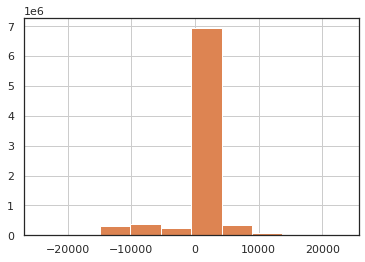

In [126]:
test1['log_value'].hist()

test1['change_variable'].hist()

# value_weight

<Axes: >

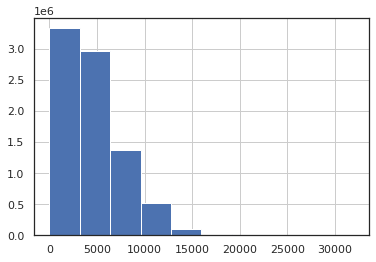

In [118]:
test1['value_weight'].hist()


In [ ]:
import statsmodels.api as sm


In [136]:
test1.columns

Index(['lon', 'lat', 'variable', 'forest_type', 'subtype', 'year', 'silt_clay',
       'stand_age_interval_min', 'cohort_area', 'land_area', 'value_weight',
       'temp', 'forest_zone', 'Area', ' vpr ', ' trange ', ' tair ', ' wind ',
       ' nirr ', ' prec ', 'log_value', 'change_variable', 'change_vpr',
       'change_trange', 'change_tair', 'change_nirr', 'change_prec'],
      dtype='object')

In [142]:
m_test1 = test1.dropna()
# m_test1 = m_test1.loc[m_test1['change_variable'].between(-500, 500)]

<Axes: >

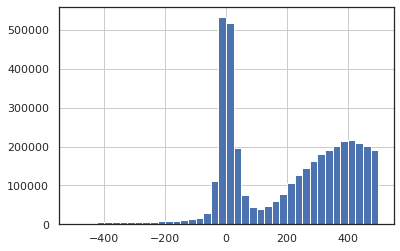

In [143]:
m_test1['change_variable'].hist(bins = 40)

In [144]:
# # Fit the model
# model = sm.OLS(m_test1['change_variable'], m_test1[[ 'stand_age_interval_min']])


model = sm.OLS(m_test1['change_variable'], m_test1[[ 'stand_age_interval_min','silt_clay',
                                          'change_vpr',
       'change_trange', 'change_tair', 'change_nirr', 'change_prec']])

results = model.fit()

##Print the regression results
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:        change_variable   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.560
Method:                 Least Squares   F-statistic:                          7.294e+05
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:35:09   Log-Likelihood:                     -2.6649e+07
No. Observations:             4010251   AIC:                                  5.330e+07
Df Residuals:                 4010244   BIC:                                  5.330e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [11]:
##### create a summary of 1950-2014 
# aggregations = {
#  'cohort_area':'sum',
#     'temp':'sum',
#     'stand_age_interval_min':'mean'
# }


all_files['temp'] = all_files['value_weight'] * all_files['cohort_area'] 
all_files['temp_stand_age'] = all_files['stand_age_interval_min'] * all_files['cohort_area'] 

##make a table for all the pfts
map_data = all_files.loc[all_files['year'].between(1984, 2014)].groupby([
       'lon', 'lat', 'variable', 'forest_type'])[['cohort_area','temp', 'temp_stand_age']].sum()



map_data['value_weight'] = map_data['temp']/map_data['cohort_area']
map_data['stand_age_interval_min'] = map_data['temp_stand_age']/map_data['cohort_area']
map_data = map_data.reset_index()

map_data = geopandas.GeoDataFrame(
    map_data, geometry=geopandas.points_from_xy(map_data.lon, map_data.lat)
    , crs="EPSG:4326"
)

map_data
#### geolocate it


,lon,lat,variable,forest_type,cohort_area,temp,temp_stand_age,value_weight,stand_age_interval_min,geometry
0,-177.0,-44.0,SOILORGC,Temperate Broadleaved Evergreen Forests,20435,1.509181e+08,1875970,7385.273214,91.801811,POINT (-177.00000 -44.00000)
1,-177.0,-44.0,VEGC,Temperate Broadleaved Evergreen Forests,20435,2.951446e+08,1875970,14443.093434,91.801811,POINT (-177.00000 -44.00000)
2,-176.5,-44.0,SOILORGC,Temperate Broadleaved Evergreen Forests,9733,4.032825e+07,66998,4143.455172,6.883592,POINT (-176.50000 -44.00000)
3,-176.5,-44.0,VEGC,Temperate Broadleaved Evergreen Forests,9733,7.194284e+07,66998,7391.641211,6.883592,POINT (-176.50000 -44.00000)
4,-175.5,-21.5,SOILORGC,Tropical,805,1.956681e+06,2693,2430.660124,3.345342,POINT (-175.50000 -21.50000)
...,...,...,...,...,...,...,...,...,...,...
67937,179.0,-16.5,VEGC,Tropical,13667,4.312080e+08,2032009,31551.038318,148.679959,POINT (179.00000 -16.50000)
67938,179.5,-17.0,SOILORGC,Tropical,51586,4.495161e+08,7778548,8713.915640,150.787966,POINT (179.50000 -17.00000)
67939,179.5,-17.0,VEGC,Tropical,51586,1.541957e+09,7778548,29890.994169,150.787966,POINT (179.50000 -17.00000)
67940,179.5,-16.5,SOILORGC,Tropical,32098,2.802733e+08,4826281,8731.799742,150.360801,POINT (179.50000 -16.50000)


In [14]:
map_data.forest_type.value_counts()

Boreal                   24774
Tropical                 23808
Temperate Deciduous       9420
Temperate Coniferous      7206
Temperate Broadleaved     2734
Name: forest_type, dtype: int64

In [13]:
map_data.loc[(map_data['forest_type']=='Temperate Broadleaved Evergreen Forests') 
             ,'forest_type'] = "Temperate Broadleaved"


<Axes: >

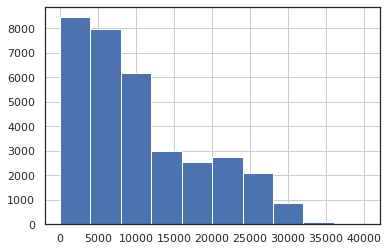

In [15]:
# map_data['value_weight'].hist()
map_data.loc[(map_data['variable']==' VEGC ') & (map_data['value_weight'] < 100000), 'value_weight'].hist()
# map_data['variable'].unique()

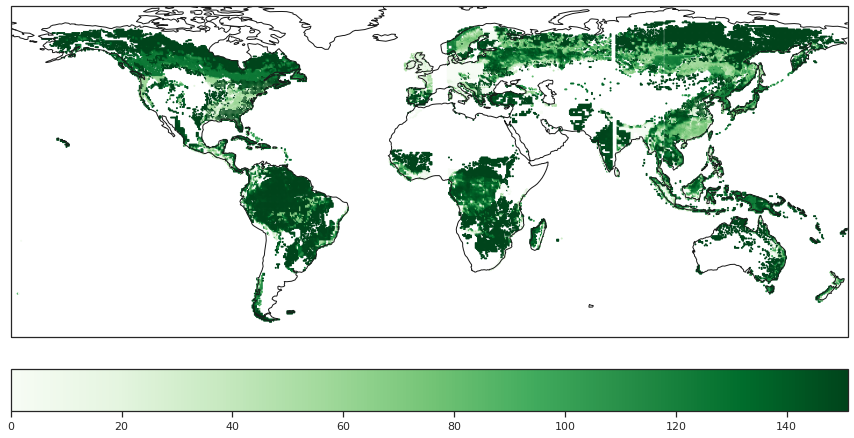

In [16]:
##### plot the globe

ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (15, 12)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")


plot0 = map_data.loc[map_data['variable']==' SOILORGC '].plot(ax = axs 
                                         ,cmap = 'Greens'
                                         , column = 'stand_age_interval_min', legend = True, 
                                         # vmin = 0, vmax = 20000, 
                                                          markersize = 1,
                                        legend_kwds={ "location":"bottom" , "pad":0.05}
                                        )



# plot1 = map_data.loc[map_data['variable']==' VEGC '].plot(ax = axs[1] 
#                                          ,cmap='tab10'
#                                          , column = 'forest_type',
                                         # ,vmin = 0, vmax = 20000
#                                         # legend_kwds={ "loc":"center right" }
#                                         )


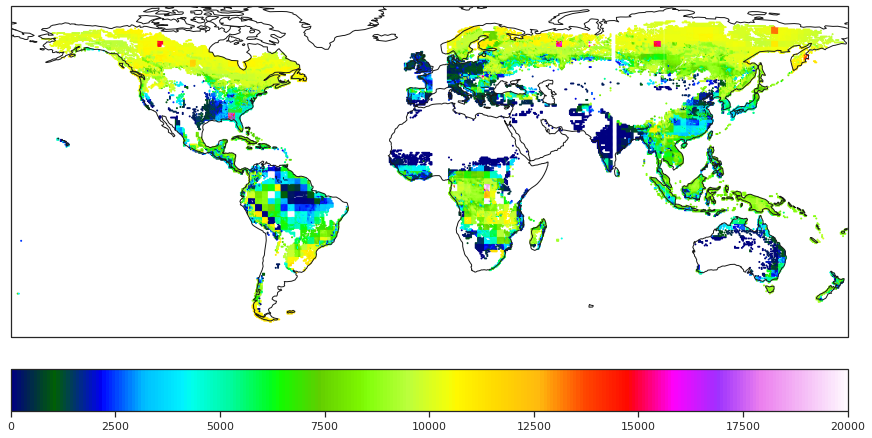

In [29]:
##### plot the globe

ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (15, 12)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")


plot0 = map_data.loc[map_data['variable']==' SOILORGC '].plot(ax = axs 
                                         ,cmap = 'gist_ncar'
                                         , column = 'value_weight', legend = True, 
                                         vmin = 0, vmax = 20000, 
                                                          markersize = 1,
                                        legend_kwds={ "location":"bottom" , "pad":0.05}
                                        )



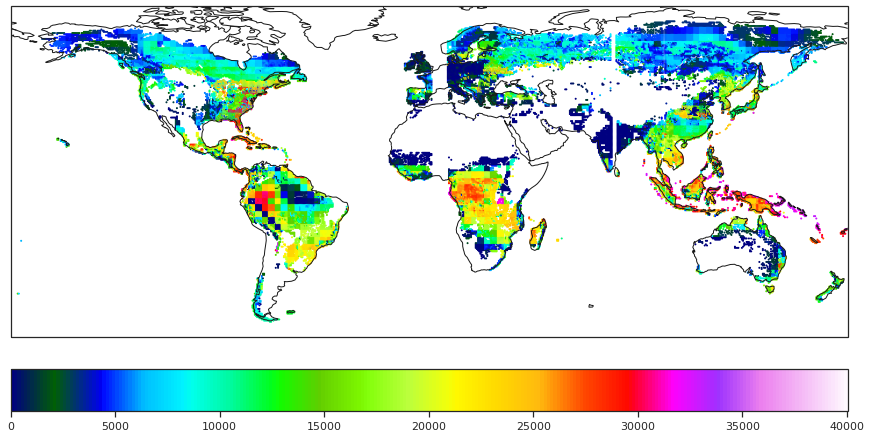

In [30]:
##### plot the globe

ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (15, 12)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")


plot0 = map_data.loc[map_data['variable']==' VEGC '].plot(ax = axs 
                                         ,cmap = 'gist_ncar'
                                         , column = 'value_weight', legend = True, 
                                         # vmin = 0, vmax = 20000, 
                                                          markersize = 1,
                                        legend_kwds={ "location":"bottom" , "pad":0.05}
                                        )



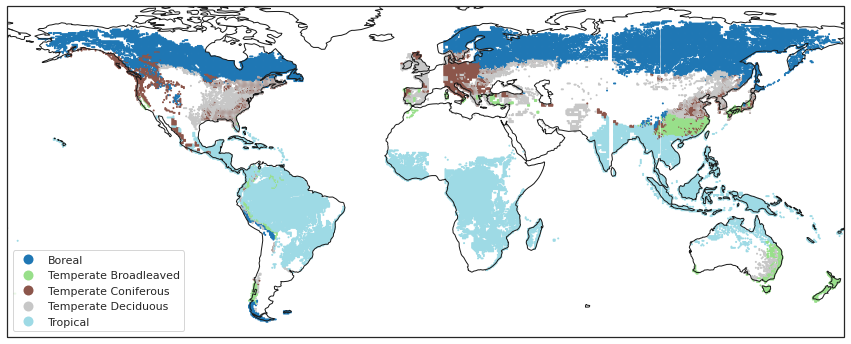

In [31]:
ig, axs = plt.subplots(nrows=1, ncols=1,figsize = (15, 15)
                      ,subplot_kw=dict(projection=ccrs.PlateCarree()))

axs.coastlines(color="0.1")
# axs[1].coastlines(color="0.1")
# colorblind_friendly_palette = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']#, '#a6cee3', '#b2df8a']

plot0 = map_data.loc[map_data['variable']==' VEGC '].plot(ax = axs 
                                          ,cmap='tab20', markersize = 1
                                         , column = 'forest_type', legend=True,
                                         # ,vmin = 0, vmax = 1,
                                        # legend_kwds={ "loc":"lower left" }
                                        )

